In [1]:
# Principal Component Analysis (PCA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load cleaned dataset
df = pd.read_csv('../results/cleaned_dataset.csv')

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"Original dataset shape: {X.shape}")


Original dataset shape: (303, 13)


In [2]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualize PCA results
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Explained Variance Ratio')

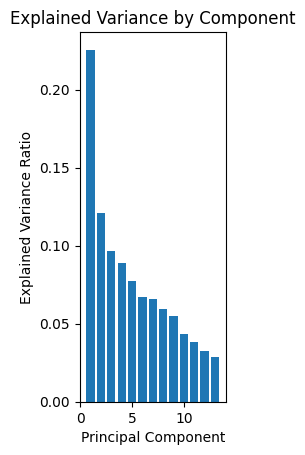

In [3]:
# 1. Explained variance per component
plt.subplot(1, 3, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Explained Variance by Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

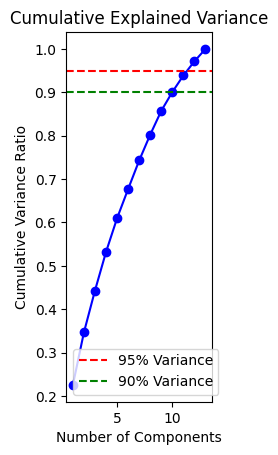

In [4]:
# 2. Cumulative explained variance
plt.subplot(1, 3, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.legend()


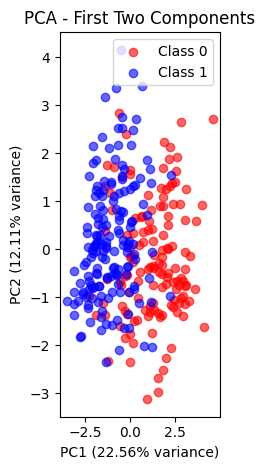

In [5]:
# 3. PCA scatter plot (first 2 components)
plt.subplot(1, 3, 3)
colors = ['red', 'blue']
for target_class in [0, 1]:
    mask = y == target_class
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=colors[target_class], 
                label=f'Class {target_class}', 
                alpha=0.6)
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
plt.title('PCA - First Two Components')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Determine optimal number of components (95% variance)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Components needed for 95% variance: {n_components_95}")

# Apply PCA with optimal components
pca_optimal = PCA(n_components=n_components_95)
X_pca_reduced = pca_optimal.fit_transform(X)

Components needed for 95% variance: 12


In [7]:

# Save PCA-transformed dataset
pca_df = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(n_components_95)])
pca_df['target'] = y.values
pca_df.to_csv('../results/pca_dataset.csv', index=False)

print("✔️ PCA-transformed dataset saved to results/pca_dataset.csv")
print("✔️ Variance retention graph created")


✔️ PCA-transformed dataset saved to results/pca_dataset.csv
✔️ Variance retention graph created
